In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd

In [7]:
import datetime as dt

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
engine = create_engine("sqlite:///desktop/MSU_Data_bootcamp/Climate_w_sqlalchemy/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model

Base = automap_base()

#this line reflects the database so that we can examine it
Base.prepare(engine, reflect=True)

#This line gets us the names of tables. 
Base.classes.keys()

['measurement', 'station']

In [11]:
# I am going to assign classes 'measurement' and 'station' to variables
# a database table is always associated with a class in python, which dictates what
#column values are expected. These columns are the attributes of a class
measur = Base.classes.measurement

stat = Base.classes.station

In [12]:
#create a session so that I can connect with the database and retreive data

sesh = Session(engine)

In [13]:
#I want to view the attributes for each table now
#this cell is for the measurements table
fr_measur = sesh.query(measur).first()

fr_measur.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2daf4ea7a30>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08}

In [14]:
#same thing as above for the stations table
fr_stat = sesh.query(stat).first()

fr_stat.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2daf4eb21c0>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Last date in file found to be 8/23/17 by inspecting .csv

#set a reference date 12mos before the last date in the set
ref_date = dt.datetime(2016, 8, 23)

#a list of columns to select
sel = [measur.prcp, measur.station, measur.id, measur.tobs, measur.date]

#write a query with a filter that specifies the date be later than the reference date
yr_precip = sesh.query(*sel).filter( measur.date > ref_date).all()

yr_precip                                       


[(0.08, 'USC00519397', 2365, 79.0, '2016-08-24'),
 (0.08, 'USC00519397', 2366, 80.0, '2016-08-25'),
 (0.0, 'USC00519397', 2367, 79.0, '2016-08-26'),
 (0.0, 'USC00519397', 2368, 77.0, '2016-08-27'),
 (0.01, 'USC00519397', 2369, 78.0, '2016-08-28'),
 (0.0, 'USC00519397', 2370, 78.0, '2016-08-29'),
 (0.0, 'USC00519397', 2371, 79.0, '2016-08-30'),
 (0.13, 'USC00519397', 2372, 80.0, '2016-08-31'),
 (0.0, 'USC00519397', 2373, 81.0, '2016-09-01'),
 (0.0, 'USC00519397', 2374, 80.0, '2016-09-02'),
 (0.0, 'USC00519397', 2375, 79.0, '2016-09-03'),
 (0.03, 'USC00519397', 2376, 75.0, '2016-09-04'),
 (None, 'USC00519397', 2377, 79.0, '2016-09-05'),
 (None, 'USC00519397', 2378, 76.0, '2016-09-06'),
 (0.05, 'USC00519397', 2379, 76.0, '2016-09-07'),
 (0.0, 'USC00519397', 2380, 80.0, '2016-09-08'),
 (0.03, 'USC00519397', 2381, 79.0, '2016-09-09'),
 (0.0, 'USC00519397', 2382, 78.0, '2016-09-10'),
 (0.05, 'USC00519397', 2383, 76.0, '2016-09-11'),
 (0.0, 'USC00519397', 2384, 78.0, '2016-09-12'),
 (0.02, 'U

In [44]:
#set up lists for the 4 most interesting quantities in the list above
precip = []
date = []
stid = []
temps = []

#this loop is to sort the quantities into the list
#it also contains a conditional to clean the precipitation data of values that say "none"
#its somewhat ambiguous, but I understand that value to mean "no precipitation", and not "null", so I'm replacing it with 0.0


for y in yr_precip:
    date.append(y[4])
    temps.append(y[3])
    stid.append(y[1])
    if type(y[0]) == float: 
        precip.append(y[0])
    else:
        precip.append(0.0)

        
#writing a dataframe for this data
y_prec = {"Date":date, "Precipitation":precip, "Temperature":temps, "Station_id":stid}
y_prec_df = pd.DataFrame(data = y_prec, index= date)

#sort the dataframe
y_prec_df = y_prec_df.sort_values(by=['Date'])

#display the first few values
y_prec_df.head(50)

,Date,Precipitation,Temperature,Station_id
2016-08-24,2016-08-24,0.08,79.0,USC00519397
2016-08-24,2016-08-24,0.00,78.0,USC00517948
2016-08-24,2016-08-24,2.15,77.0,USC00519281
2016-08-24,2016-08-24,2.28,80.0,USC00514830
2016-08-24,2016-08-24,2.15,76.0,USC00513117
2016-08-24,2016-08-24,1.45,74.0,USC00516128
2016-08-24,2016-08-24,1.22,79.0,USC00519523
2016-08-25,2016-08-25,0.08,80.0,USC00519397
2016-08-25,2016-08-25,0.00,81.0,USC00517948
2016-08-25,2016-08-25,0.06,80.0,USC00519281


In [17]:
#do the same stuff for the other table. 
#this is a small tale that doesn't need much cleaning so the proceduure is simpler. 

station_dat = sesh.query(stat.id, stat.station, stat.name, stat.elevation, stat.longitude, stat.latitude).all()

ids = []
statis = []
names = []
elevs = []
lons = []
lats = []

for st in station_dat:
    ids.append(st[0])
    statis.append(st[1])
    names.append(st[2])
    elevs.append(st[3])
    lons.append(st[4])
    lats.append(st[5])

stat_di = {'id':ids, 'Station_id':statis, 'name': names, 'latitude':lats, 'longitude': lons, 'elevation':elevs}

stat_dat = pd.DataFrame(data = stat_di)

stat_dat

,id,Station_id,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [18]:
#I'm joining these dataframes using a left join so that I can group by station or station id later

yr_combi_df = pd.merge(y_prec_df, stat_dat, on='Station_id', how="left")

yr_combi_df.head(15)

,Date,Precipitation,Temperature,Station_id,id,name,latitude,longitude,elevation
0,2016-08-24,0.08,79.0,USC00519397,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2016-08-24,0.00,78.0,USC00517948,4,"PEARL CITY, HI US",21.39340,-157.97510,11.9
2,2016-08-24,2.15,77.0,USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
3,2016-08-24,2.28,80.0,USC00514830,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
4,2016-08-24,2.15,76.0,USC00513117,2,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
5,2016-08-24,1.45,74.0,USC00516128,9,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
6,2016-08-24,1.22,79.0,USC00519523,6,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
7,2016-08-25,0.08,80.0,USC00519397,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
8,2016-08-25,0.00,81.0,USC00517948,4,"PEARL CITY, HI US",21.39340,-157.97510,11.9
9,2016-08-25,0.06,80.0,USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9


In [19]:
yr_combi_df.dtypes

Date              object
Precipitation    float64
Temperature      float64
Station_id        object
id                 int64
name              object
latitude         float64
longitude        float64
elevation        float64
dtype: object

In [20]:
yr_combi_df = yr_combi_df.astype({'Date':'datetime64[D]'})

yr_combi_df.dtypes

Date             datetime64[ns]
Precipitation           float64
Temperature             float64
Station_id               object
id                        int64
name                     object
latitude                float64
longitude               float64
elevation               float64
dtype: object

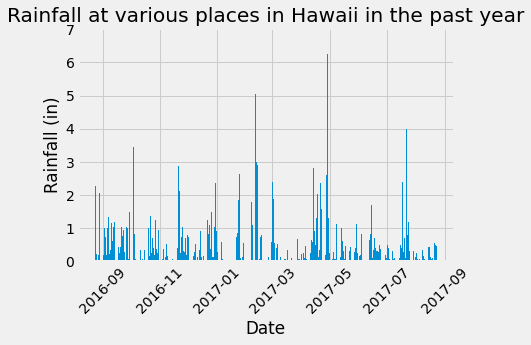

In [21]:
#construct a dataframe specifically for plotting precipitation data

#Note: in order for this to be done gracefully I needed to convert the dtype to datetime64[D] if the type is object the 
#software doesn't prune the lables and you get a black smear instead of readable lables


plt.bar(yr_combi_df['Date'], yr_combi_df['Precipitation'])

plt.xticks(rotation='45')
plt.title('Rainfall at various places in Hawaii in the past year')
plt.xlabel('Date')
plt.ylabel('Rainfall (in)')

plt.show()

In [22]:
#Basic summary stats for precipitation data

pr_stat = yr_combi_df[['Precipitation']].copy()

pr_stat.describe()

,Precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [23]:
#making a query to find the number of stations

st_ct = sesh.query(stat.station).count()

print(f'there are {st_ct} stations recording measurements')


there are 9 stations recording measurements


In [24]:
#write a query to order the stations by activity
st_act = sesh.query(measur.station, func.count(measur.station)).\
    group_by(measur.station).order_by(func.count(measur.station).desc()).all()

stids = []
mcount = []

for stat in st_act:
    stids.append(stat[0])
    mcount.append(stat[1])

stat_act_di = {'Station_id': stids, 'measurement_ct': mcount}

stat_act_df = pd.DataFrame(data = stat_act_di)

stat_act_df


,Station_id,measurement_ct
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [46]:
#write a query to order the stations by activity
#I'm doing the same thing again using the pd.read_sql approach
#I actually did it this way first and didn't want to delete my sql query

#use a query to count instances of a station showing up, group by stations and order by count descending
act_stats = pd.read_sql('SELECT station, COUNT(station) AS measurement_ct FROM measurement GROUP BY station ORDER BY COUNT(station) DESC'
                        , engine)

#I'm renaming so that I can merge in data on what the stations are
act_stats = act_stats.rename(columns={'station':'Station_id'})

#merging the data. the sort gets lost because I put the station table first for aesthetic reasons
act_stats_ex = pd.merge(stat_dat, act_stats, on='Station_id')

#dropping id column
act_stats_ex = act_stats_ex.drop(columns = ['id'])

#index on station id
act_stats_ex = act_stats_ex.set_index(['Station_id'])

#resorting
act_stats_ex = act_stats_ex.sort_values(by='measurement_ct', ascending=False)

#result
act_stats_ex

,name,latitude,longitude,elevation,measurement_ct
Station_id,,,,,
USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2772
USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,2724
USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,2709
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2669
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,2612
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,2202
USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,1979
USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,1372
USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,511


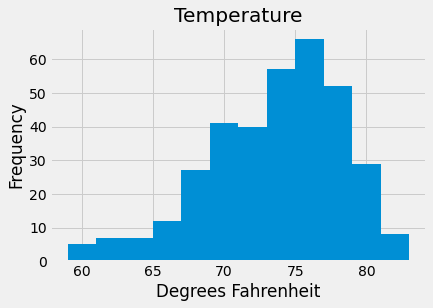

In [26]:
# write a query to obtain the last 12 months of temperature data
# I don't need to do this because I used my initial query to get temperature as well as precipitation data

y_temp_df = y_prec_df[['Temperature', 'Station_id']].copy()

yt_hist = y_temp_df[y_temp_df['Station_id'] == 'USC00519281']

yt_hist.hist(bins=12)

plt.xlabel('Degrees Fahrenheit')
plt.ylabel('Frequency')
plt.show()


In [27]:
#testing the dict output
y_temp_di = y_temp_df.to_dict()

print(y_temp_di)

{'Temperature': {'2016-08-24': 79.0, '2016-08-25': 77.0, '2016-08-26': 84.0, '2016-08-27': 81.0, '2016-08-28': 71.0, '2016-08-29': 78.0, '2016-08-30': 79.0, '2016-08-31': 78.0, '2016-09-01': 79.0, '2016-09-02': 81.0, '2016-09-03': 78.0, '2016-09-04': 75.0, '2016-09-05': 82.0, '2016-09-06': 78.0, '2016-09-07': 76.0, '2016-09-08': 81.0, '2016-09-09': 77.0, '2016-09-10': 78.0, '2016-09-11': 76.0, '2016-09-12': 76.0, '2016-09-13': 79.0, '2016-09-14': 76.0, '2016-09-15': 79.0, '2016-09-16': 78.0, '2016-09-17': 76.0, '2016-09-18': 75.0, '2016-09-19': 70.0, '2016-09-20': 76.0, '2016-09-21': 76.0, '2016-09-22': 79.0, '2016-09-23': 76.0, '2016-09-24': 83.0, '2016-09-25': 82.0, '2016-09-26': 77.0, '2016-09-27': 80.0, '2016-09-28': 77.0, '2016-09-29': 80.0, '2016-09-30': 80.0, '2016-10-01': 79.0, '2016-10-02': 80.0, '2016-10-03': 79.0, '2016-10-04': 79.0, '2016-10-05': 77.0, '2016-10-06': 80.0, '2016-10-07': 73.0, '2016-10-08': 78.0, '2016-10-09': 77.0, '2016-10-10': 75.0, '2016-10-11': 80.0, '20

In [28]:
#writing a dict for station data and activity stats
act_stats_di = act_stats_ex.to_dict()

print(act_stats_di)

{'name': {'USC00519281': 'WAIHEE 837.5, HI US', 'USC00519397': 'WAIKIKI 717.2, HI US', 'USC00513117': 'KANEOHE 838.1, HI US', 'USC00519523': 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00516128': 'MANOA LYON ARBO 785.2, HI US', 'USC00514830': 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00511918': 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00517948': 'PEARL CITY, HI US', 'USC00518838': 'UPPER WAHIAWA 874.3, HI US'}, 'latitude': {'USC00519281': 21.45167, 'USC00519397': 21.2716, 'USC00513117': 21.4234, 'USC00519523': 21.33556, 'USC00516128': 21.3331, 'USC00514830': 21.5213, 'USC00511918': 21.3152, 'USC00517948': 21.3934, 'USC00518838': 21.4992}, 'longitude': {'USC00519281': -157.84888999999998, 'USC00519397': -157.8168, 'USC00513117': -157.8015, 'USC00519523': -157.71139, 'USC00516128': -157.8025, 'USC00514830': -157.8374, 'USC00511918': -157.9992, 'USC00517948': -157.9751, 'USC00518838': -158.0111}, 'elevation': {'USC00519281': 32.9, 'USC00519397': 3.0, 'USC00513117': 14.6, 'USC00519523': 

In [30]:
#Dict for precipitation data

pre_df = yr_combi_df[['Date', 'Precipitation', 'Station_id']].copy()

pre_df = pre_df.set_index(['Date'])

pre_di = pre_df.to_dict()

print(pre_di)

{'Precipitation': {Timestamp('2016-08-24 00:00:00'): 1.22, Timestamp('2016-08-25 00:00:00'): 0.08, Timestamp('2016-08-26 00:00:00'): 0.0, Timestamp('2016-08-27 00:00:00'): 0.02, Timestamp('2016-08-28 00:00:00'): 2.07, Timestamp('2016-08-29 00:00:00'): 0.9, Timestamp('2016-08-30 00:00:00'): 0.02, Timestamp('2016-08-31 00:00:00'): 0.25, Timestamp('2016-09-01 00:00:00'): 0.0, Timestamp('2016-09-02 00:00:00'): 0.19, Timestamp('2016-09-03 00:00:00'): 0.12, Timestamp('2016-09-04 00:00:00'): 0.03, Timestamp('2016-09-05 00:00:00'): 0.0, Timestamp('2016-09-06 00:00:00'): 0.03, Timestamp('2016-09-07 00:00:00'): 0.05, Timestamp('2016-09-08 00:00:00'): 0.01, Timestamp('2016-09-09 00:00:00'): 0.23, Timestamp('2016-09-10 00:00:00'): 0.0, Timestamp('2016-09-11 00:00:00'): 0.05, Timestamp('2016-09-12 00:00:00'): 0.04, Timestamp('2016-09-13 00:00:00'): 0.34, Timestamp('2016-09-14 00:00:00'): 0.0, Timestamp('2016-09-15 00:00:00'): 0.42, Timestamp('2016-09-16 00:00:00'): 0.01, Timestamp('2016-09-17 00:00

In [31]:
#test query to help build the temperture stats routes in the app
stdt_stats = [func.avg(measur.tobs), func.min(measur.tobs), func.max(measur.tobs)]

dt_tobs = sesh.query(*stdt_stats).all()

print(dt_tobs)

stdt_di = {'Average Temp':dt_tobs[0][0], 'Min Temp':dt_tobs[0][1], 'Max Temp': dt_tobs[0][2]}

print(stdt_di)

[(73.09795396419437, 53.0, 87.0)]
{'Average Temp': 73.09795396419437, 'Min Temp': 53.0, 'Max Temp': 87.0}


In [32]:
#Bonus stuff
#temperature analysis - determine whether there is a significant difference between August and February temps
#note - I changed the months to the actual coldest and warmest month - the seasons lag more on small islands due to the thermal 
#inertia of water

import scipy.stats as st

aug_temps = pd.read_sql('''SELECT tobs FROM measurement WHERE date LIKE '%-08-%' LIMIT 1600 ''', engine)

feb_temps = pd.read_sql('''SELECT tobs FROM measurement WHERE date LIKE '%-03-%' LIMIT 1600 ''', engine)

#because these are temps are for the same place at different times, I need the paired ttest.
#this is called the related ttest in scipy

a_f_test = st.ttest_rel(aug_temps['tobs'], feb_temps['tobs'])

print(f'The p-value is {a_f_test[1]}')



The p-value is 0.0


In [33]:
#I'm going to do the same thing for June and December now, just out of curiosity

june_temps = pd.read_sql('''SELECT tobs FROM measurement WHERE date LIKE '%-06-%' LIMIT 1600 ''', engine)

dec_temps = pd.read_sql('''SELECT tobs FROM measurement WHERE date LIKE '%-03-%' LIMIT 1600 ''', engine)

a_f_test = st.ttest_rel(june_temps['tobs'], dec_temps['tobs'])

print(f'The p-value is {a_f_test[1]}')

The p-value is 1.214922452879737e-277


In [34]:
#calc temps function from starter code
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return sesh.query(func.min(measur.tobs), func.avg(measur.tobs), func.max(measur.tobs)).\
        filter(measur.date >= start_date).filter(measur.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [35]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

p_yr_temps = calc_temps('2016-08-23', '2017-08-23')

print(p_yr_temps)

[(58.0, 74.59058295964125, 87.0)]
